In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define constants

g       = 9.81              # gravitational acceleration [m/s²]

L       = 100              # length of pipeline [m]
rho     = 1000              # density of water [kg/m³]
D       = 1                 # pipe diameter 
Q0      = 2                 # initial flow in whole pipe [m³/s]
h       = 20                # water level in upstream reservoir [m]
n       = 10                # number of pipe segments in discretization
nt      = 150              # number of time steps
f_coeff = 0.01              # lambda = 0.01 Friction loss coefficient [m]
c       = 400               # propagation velocity of the pressure wave



In [3]:
# preparing the discretization and initial conditions

dx      = L/n                       # length of each pipe segment
dt      = dx/c                      # timestep according to method of characterisitics
nn      = n+1                       # number of nodes
pl_vec  = np.arange(0,nn*dx,dx)     # pl = pipe-length. position of the nodes on the pipeline
t_vec   = np.arange(0,(nt)*dt,dt) # time vector

v0 = Q0/(D**2/4*np.pi)
p0 = (rho*g*h-v0**2*rho/2)

# storage vectors for old parameters
v_old = np.full(nn,v0)
p_old = p0-(f_coeff*pl_vec/D*rho/2*v0**2)   # ref Wikipedia: Rohrreibungszahls

# storage vectors for new parameters
v_new = np.zeros_like(v_old)
p_new = np.zeros_like(p_old)

# storage vector for time evolution of parameters at node nn (at reservoir)
p_nn = np.zeros_like(t_vec)
v_nn = np.zeros_like(t_vec)

In [4]:
# time loop

for it in range(nt):
    # set boundary conditions
    v_new[-1]   = 0       # in front of the instantaneously closing valve, the velocity is 0
    p_new[0]    = p0      # hydrostatic pressure from the reservoir

    # calculate the new parameters at first and last node
    v_new[0]    = v_old[1]+1/(rho*c)*(p0-p_old[1])-f_coeff*dt/(2*D)*abs(v_old[1])*v_old[1]
    p_new[-1]   = p_old[-2]+rho*c*v_old[-2]-rho*c*f_coeff*dt/(2*D) *abs(v_old[-2])*v_old[-2]

    # calculate parameters at second to second-to-last nodes

    for i in range(1,nn-1):
        v_new[i] = 0.5*(v_old[i-1]+v_old[i+1])+0.5/(rho*c)*(p_old[i-1]-p_old[i+1]) \
            -f_coeff*dt/(4*D)*(abs(v_old[i-1])*v_old[i-1]+abs(v_old[i+1])*v_old[i+1])

        p_new[i] = 0.5*rho*c*(v_old[i-1]-v_old[i+1])+0.5*(p_old[i-1]+p_old[i+1]) \
            -rho*c*f_coeff*dt/(4*D)*(abs(v_old[i-1])*v_old[i-1]-abs(v_old[i+1])*v_old[i+1])

    # store parameters of node nn (at reservoir)
    p_nn[it] = p_old[0]
    v_nn[it] = v_old[0]

    # prepare for next loop
    p_old = p_new
    v_old = v_new





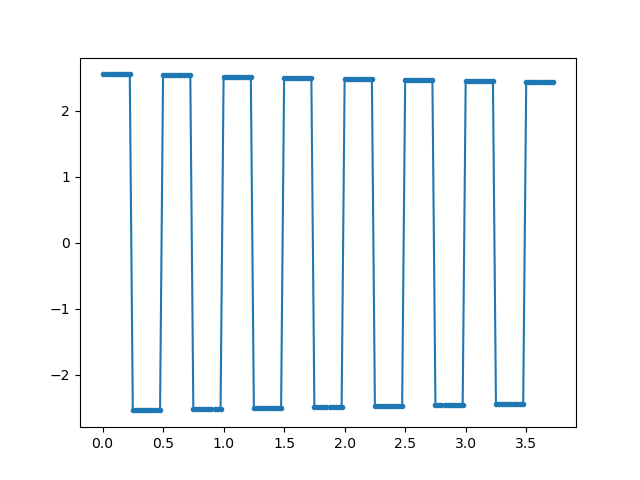

In [5]:
%matplotlib widget

plt.plot(t_vec,v_nn,'.-')

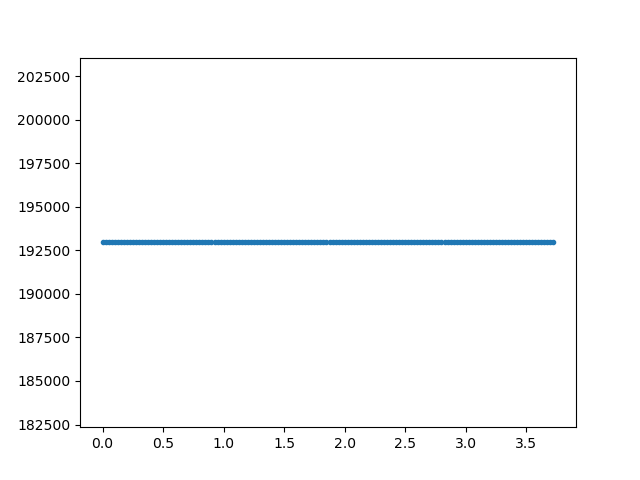

In [6]:
%matplotlib widget

plt.plot(t_vec,p_nn,'.-')